In [2]:
# This Python 3 environment comes with many helful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt

/kaggle/input/nk-hackathon-dataset/test_data.parquet
/kaggle/input/nk-hackathon-dataset/train_data.parquet


In [3]:
data_path = '/kaggle/input/nk-hackathon-dataset'
output_path = '/kaggle/working'
temp_path = '/kaggle/temp'

In [4]:
train_df = pd.read_parquet(f'{data_path}/train_data.parquet')
print(len(train_df))
# train_df['underlying'].describe()
# Convert timestamp from nanoseconds to datetime
train_df['datetime'] = pd.to_datetime(train_df['timestamp'])

# Convert expiry column to datetime
train_df['expiry_date'] = pd.to_datetime(train_df['expiry'])

# Calculate days to expiry
train_df['days_to_expiry'] = (train_df['expiry_date'] - train_df['datetime']).dt.days + 1
train_df = train_df.drop(columns=['expiry', 'expiry_date', 'datetime'])

print(train_df.columns)

178340
Index(['timestamp', 'underlying', 'call_iv_23500', 'call_iv_23600',
       'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000',
       'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400',
       'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800',
       'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200',
       'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600',
       'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000',
       'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800',
       'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200',
       'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600',
       'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000',
       'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400',
       'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800',
       'put_iv_24900', 'put_iv_25000', 'X0', 'X1'

In [5]:
# Get columns that are IV-related (call_iv or put_iv)
iv_cols = [col for col in train_df.columns if col.startswith('call_iv_') or col.startswith('put_iv_')]

# Create a boolean mask for valid rows (all IV values between 0 and 100 inclusive)
valid_rows_mask = ~((train_df[iv_cols] < 0) | (train_df[iv_cols] > 100)).any(axis=1)
# valid_rows_mask = ~(train_df[iv_cols] < 0).any(axis=1)

# Apply mask to filter the DataFrame
clean_df = train_df[valid_rows_mask].copy()

print(f"Removed {len(train_df) - len(clean_df)} invalid rows.")
train_df = clean_df
print(len(train_df))
print(clean_df.columns)

Removed 299 invalid rows.
178041
Index(['timestamp', 'underlying', 'call_iv_23500', 'call_iv_23600',
       'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000',
       'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400',
       'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800',
       'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200',
       'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600',
       'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000',
       'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800',
       'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200',
       'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600',
       'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000',
       'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400',
       'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800',
       'put_iv_24900', 

In [6]:
test_df = pd.read_parquet(f'{data_path}/test_data.parquet')
print(len(test_df))
# test_df = test_df.drop(columns=['timestamp'])
print(test_df.columns)

12065
Index(['timestamp', 'underlying', 'call_iv_24000', 'call_iv_24100',
       'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500',
       'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900',
       'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300',
       'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700',
       'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'call_iv_26100',
       'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500',
       'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300',
       'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700',
       'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100',
       'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500',
       'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900',
       'put_iv_25000', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300',
       'put_iv_25400', 'put_iv_25500', 'X0', 'X1',

# Adding ATM IV columns in train_df
`train_df['ATM_IV']`, `train_df['otmput-atm']`

In [9]:
%%time
def custom_round(val):
    remainder = val % 100
    if remainder < 50:
        return val - remainder
    else:
        return val + (100 - remainder)

# Step 1: Round underlying
train_df['atm_strike'] = train_df['underlying'].apply(custom_round)

# Step 2: Generate column names
train_df['atm_call_col'] = 'call_iv_' + train_df['atm_strike'].astype(int).astype(str)
train_df['atm_put_col'] = 'put_iv_' + train_df['atm_strike'].astype(int).astype(str)

# Step 3: Compute ATM_IV as average of call and put IVs
def compute_atm_iv(row):
    call_iv = row.get(row['atm_call_col'], float('nan'))
    put_iv = row.get(row['atm_put_col'], float('nan'))
    return np.nanmean([call_iv, put_iv])

train_df['ATM_IV'] = train_df.apply(compute_atm_iv, axis=1)

# Optional: Clean up helper columns
train_df.drop(['atm_strike', 'atm_call_col', 'atm_put_col'], axis=1, inplace=True)

CPU times: user 11.4 s, sys: 1.37 s, total: 12.7 s
Wall time: 12.7 s


In [7]:
train_df.columns

Index(['timestamp', 'underlying', 'call_iv_23500', 'call_iv_23600',
       'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000',
       'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400',
       'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800',
       'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200',
       'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600',
       'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000',
       'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800',
       'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200',
       'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600',
       'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000',
       'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400',
       'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800',
       'put_iv_24900', 'put_iv_25000', 'X0', 'X1', 'X2',

# Pivoting the table

In [8]:
train_df.columns

Index(['timestamp', 'underlying', 'call_iv_23500', 'call_iv_23600',
       'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000',
       'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400',
       'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800',
       'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200',
       'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600',
       'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000',
       'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800',
       'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200',
       'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600',
       'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000',
       'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400',
       'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800',
       'put_iv_24900', 'put_iv_25000', 'X0', 'X1', 'X2',

In [10]:
%%time
# train_df

# Assuming your DataFrame is named df
iv_columns = [col for col in train_df.columns if 'call_iv_' in col or 'put_iv_' in col]

pivoted_df = pd.melt(
    train_df,
    id_vars=['timestamp', 'underlying', 'days_to_expiry', 'ATM_IV', 'otmput-atm'] 
        + [f'X{i}' for i in range(42)],  # keep these as identifiers
    value_vars=iv_columns,
    var_name='iv_type_strike',   # new column name to hold 'call_iv_23500', etc.
    value_name='iv'              # new column name to hold the actual IV values
)

# extract strike and option type
pivoted_df['option_type'] = pivoted_df['iv_type_strike'].str.extract(r'^(call|put)')
pivoted_df['strike'] = pivoted_df['iv_type_strike'].str.extract(r'_(\d+)$').astype(float)

pivoted_df.drop(columns=['iv_type_strike'], inplace=True)


CPU times: user 45.8 s, sys: 11.5 s, total: 57.3 s
Wall time: 57.6 s


In [11]:
len(pivoted_df)
pivoted_df.columns
# pivoted_df.head(10)

Index(['timestamp', 'underlying', 'days_to_expiry', 'ATM_IV', 'otmput-atm',
       'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'iv', 'option_type', 'strike'],
      dtype='object')

In [12]:
%%time
# test_df

# Assuming your DataFrame is named df
iv_columns = [col for col in test_df.columns if 'call_iv_' in col or 'put_iv_' in col]

pivoted_test_df = pd.melt(
    test_df,
    id_vars=['underlying', 'timestamp'] 
        + [f'X{i}' for i in range(42)],  # keep these as identifiers
    value_vars=iv_columns,
    var_name='iv_type_strike',   # new column name to hold 'call_iv_23500', etc.
    value_name='iv'              # new column name to hold the actual IV values
)

# Optionally, extract strike and option type
pivoted_test_df['option_type'] = pivoted_test_df['iv_type_strike'].str.extract(r'^(call|put)')
pivoted_test_df['strike'] = pivoted_test_df['iv_type_strike'].str.extract(r'_(\d+)$').astype(float)

pivoted_test_df = pivoted_test_df.drop(columns=['iv_type_strike'])

CPU times: user 1.92 s, sys: 207 ms, total: 2.13 s
Wall time: 2.13 s


In [13]:
len(pivoted_test_df)
pivoted_test_df.columns
# pivoted_test_df.head(10)

Index(['underlying', 'timestamp', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
       'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26',
       'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36',
       'X37', 'X38', 'X39', 'X40', 'X41', 'iv', 'option_type', 'strike'],
      dtype='object')

# Regression - XGB

In [14]:
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Encode 'option_type' ---
pivoted_df['option_type_encoded'] = LabelEncoder().fit_transform(pivoted_df['option_type'])
# pivoted_df['option_type_encoded'].describe()
pivoted_df.head(10)

,timestamp,underlying,days_to_expiry,ATM_IV,otmput-atm,X0,X1,X2,X3,X4,...,X36,X37,X38,X39,X40,X41,iv,option_type,strike,option_type_encoded
0,1745467200000000000,24265.9,0,0.157322,-0.000474,0.024931,0.064710,-2.633003e+04,-0.000231,1.515111e+07,...,-0.359945,0.009600,2.385407e+05,4.682515e+06,-52502.748179,94301.073317,0.667681,call,23500.0,0
1,1745467201000000000,24266.3,0,0.154809,-0.000641,0.003638,-0.029850,-1.707887e+06,-0.004902,1.243876e+07,...,-0.315705,0.005855,-1.507720e+06,2.769596e+06,-85795.437756,-21451.196915,0.671606,call,23500.0,0
2,1745467202000000000,24265.1,0,0.156134,-0.000108,0.131508,-0.019854,9.559350e+05,0.002382,1.540360e+06,...,0.042678,-0.001034,-4.325772e+06,-5.365738e+06,104061.441336,929402.352028,0.668400,call,23500.0,0
3,1745467203000000000,24264.8,0,0.156662,0.000063,-0.203908,0.039758,-8.882702e+05,-0.004252,-1.429997e+07,...,-0.578951,0.010134,-6.905549e+06,-3.487558e+06,-897729.647151,128563.488357,0.669482,call,23500.0,0
4,1745467204000000000,24266.8,0,0.156043,-0.000367,-0.097371,0.025589,2.477192e+05,-0.001958,-9.245750e+06,...,-0.321570,-0.005652,4.777027e+06,-4.553852e+05,104498.374845,68814.385442,0.668081,call,23500.0,0
5,1745467205000000000,24268.4,0,0.155629,-0.000834,0.023006,0.158551,-3.610651e+04,-0.000631,1.135541e+07,...,0.269779,0.003528,7.429973e+06,1.113606e+07,399343.385025,569595.371529,0.670237,call,23500.0,0
6,1745467206000000000,24268.1,0,0.156063,-0.000654,0.064825,-0.013725,3.192156e+05,-0.000322,4.949654e+07,...,0.527355,0.006631,4.578511e+05,1.333520e+07,61434.941902,206409.927965,0.676630,call,23500.0,0
7,1745467207000000000,24267.8,0,0.155516,-0.000405,0.091046,-0.065586,7.913964e+03,-0.002307,6.296461e+07,...,0.516493,-0.005936,4.132061e+05,3.754258e+06,-18805.232501,-28030.048077,0.672047,call,23500.0,0
8,1745467208000000000,24268.3,0,0.156297,-0.000269,-0.010207,0.081163,-1.739230e+05,-0.006111,6.372075e+06,...,0.442843,-0.007408,1.044593e+06,-6.294312e+06,-143079.400153,-35658.766595,0.671019,call,23500.0,0
9,1745467209000000000,24268.7,0,0.154064,-0.000777,0.144542,0.088506,4.149615e+05,-0.003482,5.859694e+06,...,0.487108,0.009674,4.935639e+06,2.878837e+06,496618.395994,-183999.198718,0.675154,call,23500.0,0


In [15]:
days = pivoted_df['days_to_expiry'].unique().tolist()

In [16]:
# Define moneyness as the ratio of underlying price to strike price
pivoted_df['moneyness'] = pivoted_df['underlying'] / pivoted_df['strike']
pivoted_df['log_moneyness'] = np.log(pivoted_df['moneyness'])
pivoted_df.columns

Index(['timestamp', 'underlying', 'days_to_expiry', 'ATM_IV', 'otmput-atm',
       'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'iv', 'option_type', 'strike', 'option_type_encoded',
       'moneyness', 'log_moneyness'],
      dtype='object')

In [32]:
%%time

# --- Step 2: Define features and target ---
moneyness_features = ['moneyness', 'log_moneyness']
features = ['underlying', 'days_to_expiry'] + [f'X{i}' for i in range(42)] + ['option_type_encoded', 'strike'] + moneyness_features
target = 'iv'

X = pivoted_df[features]
y = pivoted_df[target]
y.isna().sum()

CPU times: user 784 ms, sys: 1.15 s, total: 1.94 s
Wall time: 1.94 s


0

In [33]:
%%time

import xgboost as xgb
from sklearn.model_selection import train_test_split

# --- Step 3: Train/Test Split (for validation) ---
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y
X_val = X[:1000]
y_val = y[:1000]

# --- Step 4: Train XGBoost Regressor ---
model = xgb.XGBRegressor(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

[0]	validation_0-rmse:0.33665
[1]	validation_0-rmse:0.32010
[2]	validation_0-rmse:0.30442
[3]	validation_0-rmse:0.28945
[4]	validation_0-rmse:0.27537
[5]	validation_0-rmse:0.26211
[6]	validation_0-rmse:0.25636
[7]	validation_0-rmse:0.24408
[8]	validation_0-rmse:0.23274
[9]	validation_0-rmse:0.22652
[10]	validation_0-rmse:0.21567
[11]	validation_0-rmse:0.20586
[12]	validation_0-rmse:0.19653
[13]	validation_0-rmse:0.18770
[14]	validation_0-rmse:0.17945
[15]	validation_0-rmse:0.17089
[16]	validation_0-rmse:0.16219
[17]	validation_0-rmse:0.15520
[18]	validation_0-rmse:0.15371
[19]	validation_0-rmse:0.14740
[20]	validation_0-rmse:0.14185
[21]	validation_0-rmse:0.13741
[22]	validation_0-rmse:0.13252
[23]	validation_0-rmse:0.12645
[24]	validation_0-rmse:0.12154
[25]	validation_0-rmse:0.11650
[26]	validation_0-rmse:0.11095
[27]	validation_0-rmse:0.10663
[28]	validation_0-rmse:0.10184
[29]	validation_0-rmse:0.09746
[30]	validation_0-rmse:0.09301
[31]	validation_0-rmse:0.09036
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

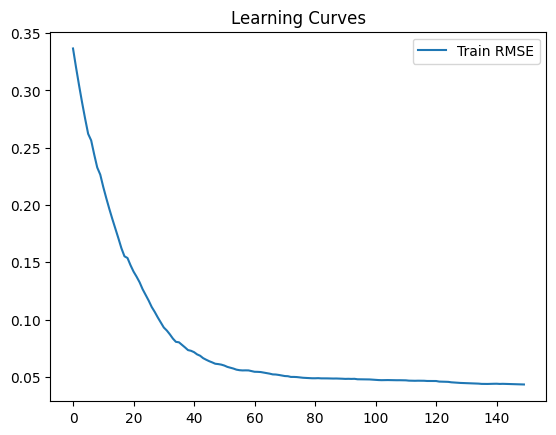

In [34]:
results = model.evals_result()

import matplotlib.pyplot as plt

plt.plot(results['validation_0']['rmse'], label='Train RMSE')
# plt.plot(results['validation_1']['rmse'], label='Val RMSE')
plt.legend()
plt.title("Learning Curves")
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

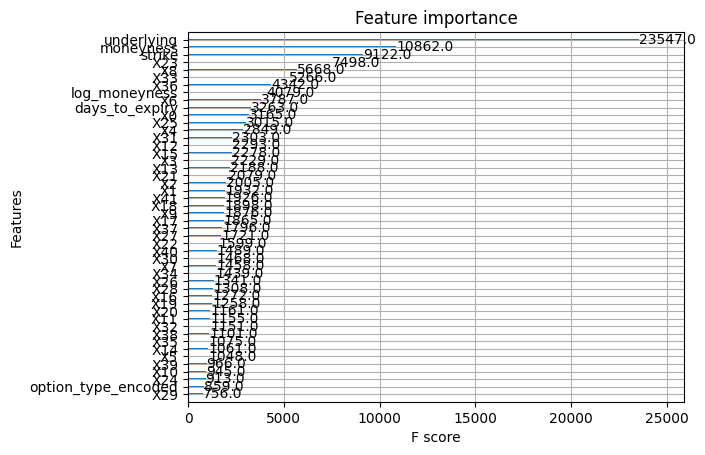

In [35]:
xgb.plot_importance(model)

In [42]:
# %%time
# # --- Step 5: Evaluate (optional) ---
# # error on predicting on non NANs in training data

# from sklearn.metrics import mean_squared_error, mean_absolute_error

# y_train_pred = model.predict(X_train)
# mse = mean_squared_error(y_train, y_train_pred)
# mae = mean_absolute_error(y_train, y_train_pred)
# print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, Ratio: {mse/mae:.2f}")

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# y_pred = model.predict(X_val)
# mse = mean_squared_error(y_true, y_pred)
# mae = mean_absolute_error(y_true, y_pred)
# print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, Ratio: {mse/mae:.2f}")

#     # A high MSE-to-MAE ratio (e.g., >2 or 3) → suggests some very large errors.


# Predicting IV half-way Test df

In [36]:
# pivoted_test_df.head(10)
pivoted_test_df['option_type_encoded'] = LabelEncoder().fit_transform(pivoted_test_df['option_type'])
pivoted_test_df['moneyness'] = pivoted_test_df['underlying'] / pivoted_test_df['strike']
pivoted_test_df['log_moneyness'] = np.log(pivoted_test_df['moneyness'])

In [37]:
pivoted_test_df.columns

Index(['underlying', 'timestamp', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
       'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26',
       'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36',
       'X37', 'X38', 'X39', 'X40', 'X41', 'iv', 'option_type', 'strike',
       'option_type_encoded', 'moneyness', 'log_moneyness'],
      dtype='object')

In [39]:
# Define features
moneyness_features = ['moneyness', 'log_moneyness']
features = ['underlying'] + [f'X{i}' for i in range(42)] + ['option_type_encoded', 'strike'] + moneyness_features
target = 'iv'

# Filter non-NaN rows from test set
test_non_nan = pivoted_test_df[pivoted_test_df['iv'].notna()]

# Prepare data
X_test_non_nan = test_non_nan[features]
y_test_non_nan = test_non_nan[target]

In [40]:
# test_df.drop(columns=['days_to_expiry'], inplace=True)
X_test_non_nan.columns

Index(['underlying', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39', 'X40', 'X41', 'option_type_encoded', 'strike', 'moneyness',
       'log_moneyness'],
      dtype='object')

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_results = {}

# Iterate over possible days_to_expiry values (0 through 6)
for day in days:    
    
    # Prepare feature matrix
    X_test = X_test_non_nan.copy()
    X_test['days_to_expiry'] = day
    
    cols = X_test.columns.tolist()
    cols.remove('days_to_expiry')
    underlying_idx = cols.index('underlying')
    cols.insert(underlying_idx + 1, 'days_to_expiry')
    X_test = X_test[cols]
    # print(X_test.columns)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test_non_nan, y_pred))
    rmse_results[day] = rmse

# Find the day with the lowest RMSE
best_day = min(rmse_results, key=rmse_results.get)

print("Best days_to_expiry:", best_day)
print("RMSE for each day:", rmse_results)


Best days_to_expiry: 3
RMSE for each day: {0: 0.6987624111523761, 5: 0.059970852579363666, 2: 0.06462655437698461, 1: 0.1019136730870217, 6: 0.06719878590726468, 3: 0.05822353194638225}


In [57]:
pivoted_test_df['days_to_expiry'] = 6
# Separate rows with missing IV values
test_with_nan_iv = pivoted_test_df[pd.isna(pivoted_test_df['iv'])]

# Features to use for prediction

moneyness_features = ['moneyness', 'log_moneyness']
features = ['underlying', 'days_to_expiry'] + [f'X{i}' for i in range(42)] + ['option_type_encoded', 'strike'] + moneyness_features
# features = ['underlying'] + top_features + ['option_type_encoded', 'strike', 'moneyness']

# Predict IV values for rows with NaN
X_pred = test_with_nan_iv[features]
predicted_iv = model.predict(X_pred)

# Assign predictions back to the DataFrame
pivoted_test_df['iv_pred'] = pivoted_test_df['iv']
pivoted_test_df.loc[test_with_nan_iv.index, 'iv_pred'] = predicted_iv

In [58]:
pivoted_test_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,underlying,timestamp,X0,X1,X2,X3,X4,X5,X6,X7,...,X41,iv,option_type,strike,option_type_encoded,moneyness,log_moneyness,days_to_expiry,iv_pred,iv_column
0,24735.9,0,-2.377420e+06,-0.066961,-0.064562,-0.068452,2.307887e+04,117442.708333,-5.593597e+04,-0.000000,...,-5.362742e+06,0.280939,call,24000.0,0,1.030663,0.030202,6,0.280939,call_iv_24000
1,24766.7,1,6.703629e+06,0.030899,-0.031677,-0.033302,3.511990e+04,-153269.531250,-1.084932e+05,0.000000,...,4.624907e+06,0.270276,call,24000.0,0,1.031946,0.031446,6,0.270276,call_iv_24000
2,24896.9,2,2.245442e+06,-0.066279,-0.162606,-0.233426,-7.772303e+04,26958.333333,4.740967e+05,0.000000,...,-2.669766e+06,NaN,call,24000.0,0,1.037371,0.036689,6,0.271122,call_iv_24000
3,24898.1,3,-1.718577e+07,-0.046657,-0.497496,-0.321425,2.278475e+05,-114322.916667,1.308353e+05,0.000000,...,-1.858254e+07,0.241888,call,24000.0,0,1.037421,0.036738,6,0.241888,call_iv_24000
4,24906.5,4,7.473684e+06,-0.440429,0.554007,-0.319750,4.814557e+05,9713.541667,1.064944e+06,0.000000,...,3.024212e+06,0.235328,call,24000.0,0,1.037771,0.037075,6,0.235328,call_iv_24000
5,25030.6,5,-6.203239e+05,0.110697,0.306125,0.129553,-3.347578e+05,-91429.687500,-1.228395e+06,0.000000,...,1.809423e+04,NaN,call,24000.0,0,1.042942,0.042045,6,0.259040,call_iv_24000
6,24794.1,6,-4.877649e+06,-0.076867,-0.352778,-0.187616,1.100413e+06,230240.625000,3.695836e+06,0.000000,...,-3.156272e+06,NaN,call,24000.0,0,1.033087,0.032552,6,0.273154,call_iv_24000
7,24830.0,7,-7.706738e+07,-0.100896,-0.811258,-0.333135,-1.808039e+05,-16518.750000,-7.942650e+05,-6511.484216,...,-1.830594e+07,0.275760,call,24000.0,0,1.034583,0.033999,6,0.275760,call_iv_24000
8,24922.0,8,-8.257922e+04,-0.020418,0.185408,0.083638,-3.205901e+05,0.000000,-1.422025e+06,0.000000,...,-2.410103e+06,NaN,call,24000.0,0,1.038417,0.037697,6,0.214091,call_iv_24000
9,24914.5,9,-3.869136e+06,-0.042301,0.056408,0.084987,4.782435e+05,136367.187500,6.010482e+05,0.000000,...,-2.031611e+06,NaN,call,24000.0,0,1.038104,0.037396,6,0.261136,call_iv_24000


In [69]:
# reduced_test_df = pivoted_test_df[['timestamp', 'underlying', 'option_type', 'strike', 'iv']]
# reduced_test_df.head(10)

,timestamp,underlying,option_type,strike,iv
0,0,24735.9,call,24000.0,0.280939
1,1,24766.7,call,24000.0,0.270276
2,2,24896.9,call,24000.0,0.301961
3,3,24898.1,call,24000.0,0.241888
4,4,24906.5,call,24000.0,0.235328
5,5,25030.6,call,24000.0,0.296823
6,6,24794.1,call,24000.0,0.308436
7,7,24830.0,call,24000.0,0.275760
8,8,24922.0,call,24000.0,0.260484
9,9,24914.5,call,24000.0,0.308396


In [59]:
%%time
# Assume your pivoted long-form DataFrame is called `pivoted_df`

# Step 1: Create a new column for combined headers
pivoted_test_df['iv_column'] = pivoted_test_df['option_type'] + '_iv_' + pivoted_test_df['strike'].astype(int).astype(str)

# Step 2: Pivot to wide format
test_df_2 = pivoted_test_df.pivot_table(
    index=['timestamp', 'underlying', 'days_to_expiry'] + [f'X{i}' for i in range(42)],  # group by timestamp and underlying
    columns='iv_column',                # new columns from combined option type + strike
    values='iv_pred',                        # values to fill
    aggfunc='first'                     # in case of duplicates
).reset_index()

# Step 3: Optional – flatten multi-level columns if needed
test_df_2.columns.name = None  # remove pivot column name

CPU times: user 2.67 s, sys: 302 ms, total: 2.98 s
Wall time: 2.98 s


In [60]:
test_df_2.head(5)

,timestamp,underlying,days_to_expiry,X0,X1,X2,X3,X4,X5,X6,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,24735.9,6,-2.377420e+06,-0.066961,-0.064562,-0.068452,23078.869048,117442.708333,-5.593597e+04,...,0.232334,0.139591,0.134956,0.227301,0.234169,0.160592,0.250422,0.223734,0.227853,0.282229
1,1,24766.7,6,6.703629e+06,0.030899,-0.031677,-0.033302,35119.903274,-153269.531250,-1.084932e+05,...,0.155531,0.228209,0.137501,0.133171,0.135170,0.249402,0.151927,0.155046,0.211480,0.228922
2,2,24896.9,6,2.245442e+06,-0.066279,-0.162606,-0.233426,-77723.028274,26958.333333,4.740967e+05,...,0.194612,0.188052,0.146129,0.137799,0.181346,0.137773,0.190750,0.158961,0.161542,0.217239
3,3,24898.1,6,-1.718577e+07,-0.046657,-0.497496,-0.321425,227847.544643,-114322.916667,1.308353e+05,...,0.164479,0.166394,0.161561,0.136317,0.133493,0.172032,0.133595,0.154865,0.156729,0.206107
4,4,24906.5,6,7.473684e+06,-0.440429,0.554007,-0.319750,481455.729167,9713.541667,1.064944e+06,...,0.172364,0.158579,0.157780,0.177920,0.136891,0.176000,0.138498,0.166691,0.182314,0.224475


temp

In [ ]:
# reduced_test_df_2 = pivoted_test_df_2[['timestamp', 'underlying', 'option_type', 'strike', 'iv']]
# reduced_test_df_2.head(10)

In [47]:
# # Assume your pivoted long-form DataFrame is called `pivoted_df`

# # Step 1: Create a new column for combined headers
# reduced_test_df_2['iv_column'] = reduced_test_df_2['option_type'] + '_iv_' + reduced_test_df_2['strike'].astype(int).astype(str)

# # Step 2: Pivot to wide format
# wide_df = reduced_test_df_2.pivot_table(
#     index=['timestamp', 'underlying'],  # group by timestamp and underlying
#     columns='iv_column',                # new columns from combined option type + strike
#     values='iv',                        # values to fill
#     aggfunc='first'                     # in case of duplicates
# ).reset_index()

# # Step 3: Optional – flatten multi-level columns if needed
# wide_df.columns.name = None  # remove pivot column name


NameError: name 'reduced_test_df_2' is not defined

In [61]:
# test_df_2.columns
test_df_2.head(10)

,timestamp,underlying,days_to_expiry,X0,X1,X2,X3,X4,X5,X6,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,24735.9,6,-2.377420e+06,-0.066961,-0.064562,-0.068452,2.307887e+04,117442.708333,-5.593597e+04,...,0.232334,0.139591,0.134956,0.227301,0.234169,0.160592,0.250422,0.223734,0.227853,0.282229
1,1,24766.7,6,6.703629e+06,0.030899,-0.031677,-0.033302,3.511990e+04,-153269.531250,-1.084932e+05,...,0.155531,0.228209,0.137501,0.133171,0.135170,0.249402,0.151927,0.155046,0.211480,0.228922
2,2,24896.9,6,2.245442e+06,-0.066279,-0.162606,-0.233426,-7.772303e+04,26958.333333,4.740967e+05,...,0.194612,0.188052,0.146129,0.137799,0.181346,0.137773,0.190750,0.158961,0.161542,0.217239
3,3,24898.1,6,-1.718577e+07,-0.046657,-0.497496,-0.321425,2.278475e+05,-114322.916667,1.308353e+05,...,0.164479,0.166394,0.161561,0.136317,0.133493,0.172032,0.133595,0.154865,0.156729,0.206107
4,4,24906.5,6,7.473684e+06,-0.440429,0.554007,-0.319750,4.814557e+05,9713.541667,1.064944e+06,...,0.172364,0.158579,0.157780,0.177920,0.136891,0.176000,0.138498,0.166691,0.182314,0.224475
5,5,25030.6,6,-6.203239e+05,0.110697,0.306125,0.129553,-3.347578e+05,-91429.687500,-1.228395e+06,...,0.187522,0.190842,0.166117,0.181670,0.177992,0.139386,0.177270,0.139674,0.179433,0.160072
6,6,24794.1,6,-4.877649e+06,-0.076867,-0.352778,-0.187616,1.100413e+06,230240.625000,3.695836e+06,...,0.225048,0.144091,0.136136,0.131430,0.133491,0.132484,0.140887,0.142757,0.167775,0.271001
7,7,24830.0,6,-7.706738e+07,-0.100896,-0.811258,-0.333135,-1.808039e+05,-16518.750000,-7.942650e+05,...,0.168478,0.222416,0.145156,0.221060,0.228808,0.237793,0.243166,0.252460,0.231316,0.235275
8,8,24922.0,6,-8.257922e+04,-0.020418,0.185408,0.083638,-3.205901e+05,0.000000,-1.422025e+06,...,0.165135,0.162373,0.155460,0.146628,0.141325,0.173868,0.134386,0.179501,0.137790,0.136732
9,9,24914.5,6,-3.869136e+06,-0.042301,0.056408,0.084987,4.782435e+05,136367.187500,6.010482e+05,...,0.193230,0.166768,0.182182,0.145032,0.140329,0.176044,0.139747,0.178204,0.162886,0.184636


In [62]:
# Create a copy of the IV columns
wide_df_fin = test_df_2.drop(columns=['underlying', 'days_to_expiry'] + [col for col in test_df_2.columns if 'X' in col])
# iv_df = test_df[iv_cols].copy()

# Round only float columns to 6 decimal places
float_cols = wide_df_fin.select_dtypes(include='float').columns
wide_df_fin[float_cols] = wide_df_fin[float_cols].round(6)

# Save to CSV
wide_df_fin.to_csv("iv_predictions4jun3.csv", index=False)

end temp

In [33]:
test_df_2.columns
test_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,0,24735.9,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,...,0.006587,0.002826,-1.737617e+05,-0.009541,-0.017831,0.000264,2.032521e+06,1.000000e-06,-0.077238,-5.362742e+06
1,1,24766.7,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,...,0.005777,0.004588,-3.195086e+05,-0.024106,-0.004696,-0.000158,-4.529075e+06,-1.619022e+06,-0.956928,4.624907e+06
2,2,24896.9,NaN,0.251731,NaN,NaN,0.214869,0.204580,0.194604,NaN,...,0.000829,-0.034944,1.027525e+06,0.028201,0.032234,0.007687,2.663908e+06,0.000000e+00,-0.116264,-2.669766e+06
3,3,24898.1,0.241888,NaN,0.220505,NaN,0.198602,0.186190,NaN,NaN,...,-0.009323,-0.022969,-4.720074e+06,-0.001513,0.008704,-0.000206,-7.672936e+06,-1.903406e+06,-2.249208,-1.858254e+07
4,4,24906.5,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,...,-0.018674,-0.007588,-4.051681e+05,-0.136267,0.002425,-0.002200,1.334469e+06,2.548789e+05,1.999104,3.024212e+06
5,5,25030.6,NaN,NaN,NaN,0.222966,NaN,NaN,NaN,NaN,...,0.000682,-0.004743,1.984097e+06,0.050091,0.018204,0.001574,-5.612974e+06,1.612886e+06,-0.355290,1.809423e+04
6,6,24794.1,NaN,0.263735,NaN,0.239511,NaN,NaN,0.224797,0.221294,...,0.011896,-0.015666,6.970378e+04,0.000766,0.001847,0.001050,6.732529e+06,1.000000e-06,0.609114,-3.156272e+06
7,7,24830.0,0.275760,0.283110,NaN,NaN,NaN,0.238596,0.232301,NaN,...,-0.003605,-0.024457,-4.650614e+06,-0.014348,-0.022362,-0.006061,-9.063255e+06,-2.781773e+06,-0.912295,-1.830594e+07
8,8,24922.0,NaN,NaN,0.221020,NaN,NaN,NaN,0.188084,NaN,...,0.005458,0.013694,9.630289e+05,-0.024210,-0.009825,0.002278,-7.733904e+04,0.000000e+00,-0.321883,-2.410103e+06
9,9,24914.5,NaN,0.229899,NaN,0.214569,NaN,NaN,NaN,NaN,...,0.006171,0.009534,-1.226847e+07,0.015713,0.008899,-0.002970,2.274161e+06,-1.624551e+06,0.933906,-2.031611e+06


# [](http://)Training another model with more features using predicted values
1. ATM IV
2. OTM Put IV − ATM IV  (5% OTM put. 5% below stock price)

In [77]:
%%time
# Step 1: Round underlying
test_df_2['atm_strike'] = test_df_2['underlying'].apply(custom_round)

# Step 2: Generate column names
test_df_2['atm_call_col'] = 'call_iv_' + test_df_2['atm_strike'].astype(int).astype(str)
test_df_2['atm_put_col'] = 'put_iv_' + test_df_2['atm_strike'].astype(int).astype(str)

# Step 3: Compute ATM_IV as average of call and put IVs
def compute_atm_iv(row):
    call_iv = row.get(row['atm_call_col'], float('nan'))
    put_iv = row.get(row['atm_put_col'], float('nan'))
    return np.nanmean([call_iv, put_iv])

test_df_2['ATM_IV'] = test_df_2.apply(compute_atm_iv, axis=1)

# Step 4: Compute PutDiff_IV = put_iv - ATM_IV
def compute_put_diff(row):
    put_iv = row.get(row['atm_put_col'], float('nan'))
    return put_iv - row['ATM_IV'] if pd.notnull(put_iv) and pd.notnull(row['ATM_IV']) else np.nan

test_df_2['otmput-atm'] = test_df_2.apply(compute_put_diff, axis=1)

# Optional: Clean up helper columns
test_df_2.drop(['atm_strike', 'atm_call_col', 'atm_put_col'], axis=1, inplace=True)

CPU times: user 770 ms, sys: 82 µs, total: 770 ms
Wall time: 769 ms


In [78]:
test_df_2.columns

Index(['timestamp', 'underlying', 'days_to_expiry', 'X0', 'X1', 'X2', 'X3',
       'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14',
       'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34',
       'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'call_iv_24000',
       'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400',
       'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800',
       'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200',
       'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600',
       'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000',
       'call_iv_26100', 'call_iv_26200', 'call_iv_26300', 'call_iv_26400',
       'call_iv_26500', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200',
       'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600',
       'put_iv_23700', 'pu

In [84]:
%%time
# pivoting test_df_2

# Assuming your DataFrame is named df
iv_columns = [col for col in test_df.columns if 'call_iv_' in col or 'put_iv_' in col]

pivoted_test_df_2 = pd.melt(
    test_df_2,
    id_vars=['timestamp', 'underlying', 'days_to_expiry', 'ATM_IV', 'otmput-atm'] 
        + [f'X{i}' for i in range(42)],  # keep these as identifiers
    value_vars=iv_columns,
    var_name='iv_type_strike',   # new column name to hold 'call_iv_23500', etc.
    value_name='iv'              # new column name to hold the actual IV values
)

# Optionally, extract strike and option type
pivoted_test_df_2['option_type'] = pivoted_test_df_2['iv_type_strike'].str.extract(r'^(call|put)')
pivoted_test_df_2['strike'] = pivoted_test_df_2['iv_type_strike'].str.extract(r'_(\d+)$').astype(float)

pivoted_test_df_2 = pivoted_test_df_2.drop(columns=['iv_type_strike'])

pivoted_test_df_2['option_type_encoded'] = LabelEncoder().fit_transform(pivoted_test_df_2['option_type'])

CPU times: user 4.25 s, sys: 219 ms, total: 4.47 s
Wall time: 4.47 s


In [96]:
# Define moneyness as the ratio of underlying price to strike price
pivoted_test_df_2['moneyness'] = pivoted_test_df_2['underlying'] / pivoted_test_df['strike']
pivoted_test_df_2['log_moneyness'] = np.log(pivoted_test_df_2['moneyness'])

In [98]:
pivoted_test_df_2.columns

Index(['timestamp', 'underlying', 'days_to_expiry', 'ATM_IV', 'otmput-atm',
       'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'iv', 'option_type', 'strike', 'option_type_encoded',
       'moneyness', 'log_moneyness'],
      dtype='object')

# Training 2nd XGBoost model

In [101]:
%%time
# --- Step 2: Define features and target ---

moneyness_features = ['moneyness', 'log_moneyness']
features = ['underlying', 'days_to_expiry', 'ATM_IV', 'otmput-atm'] + [f'X{i}' for i in range(42)] + ['option_type_encoded', 'strike'] + moneyness_features
target = 'iv'

X = pivoted_df[features]
y = pivoted_df[target]

y.isna().sum()

CPU times: user 1.67 s, sys: 750 ms, total: 2.42 s
Wall time: 2.43 s


0

In [102]:
%%time

import xgboost as xgb
from sklearn.model_selection import train_test_split

# --- Step 3: Train/Test Split (for validation) ---
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y
X_val = X[:100]
y_val = y[:100]

# --- Step 4: Train XGBoost Regressor ---
model2 = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
)

model2.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

[0]	validation_0-rmse:0.32663
[1]	validation_0-rmse:0.31095
[2]	validation_0-rmse:0.28185
[3]	validation_0-rmse:0.26781
[4]	validation_0-rmse:0.25448
[5]	validation_0-rmse:0.24194
[6]	validation_0-rmse:0.22995
[7]	validation_0-rmse:0.21831
[8]	validation_0-rmse:0.20950
[9]	validation_0-rmse:0.18950
[10]	validation_0-rmse:0.18363
[11]	validation_0-rmse:0.17447
[12]	validation_0-rmse:0.16571
[13]	validation_0-rmse:0.15946
[14]	validation_0-rmse:0.15603
[15]	validation_0-rmse:0.14199
[16]	validation_0-rmse:0.12941
[17]	validation_0-rmse:0.11853
[18]	validation_0-rmse:0.11389
[19]	validation_0-rmse:0.10742
[20]	validation_0-rmse:0.10459
[21]	validation_0-rmse:0.10165
[22]	validation_0-rmse:0.09648
[23]	validation_0-rmse:0.08836
[24]	validation_0-rmse:0.08426
[25]	validation_0-rmse:0.07871
[26]	validation_0-rmse:0.07381
[27]	validation_0-rmse:0.06966
[28]	validation_0-rmse:0.06578
[29]	validation_0-rmse:0.06350
[30]	validation_0-rmse:0.06224
[31]	validation_0-rmse:0.05951
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb.plot_importance(model2)

## fine - tuning

In [103]:
# Filter non-NaN rows from test set
test_non_nan = pivoted_test_df_2[pivoted_test_df_2['iv'].notna()]

# Prepare data
X_test_non_nan = test_non_nan[features]
y_test_non_nan = test_non_nan[target]

In [104]:
%%time

# Optional: split to validation set to monitor overfitting
# X_ft_train, X_ft_val, y_ft_train, y_ft_val = train_test_split(X_finetune, y_finetune, test_size=0.2, random_state=42)
X_ft_train = X_test_non_nan
y_ft_train = y_test_non_nan
X_ft_val = X_ft_train[:100]
y_ft_val = y_ft_train[:100]

# Fine-tune using few boosting rounds
# Continue training (fine-tuning) on non-NaN test data

# model.set_params(
#     early_stopping_rounds=20,
#     eval_metric="rmse"
# )

model2.fit(
    X_ft_train,
    y_ft_train,
    eval_set=[(X_ft_val, y_ft_val)],
    verbose=True
)

[0]	validation_0-rmse:0.03886
[1]	validation_0-rmse:0.03781
[2]	validation_0-rmse:0.03688
[3]	validation_0-rmse:0.03605
[4]	validation_0-rmse:0.03519
[5]	validation_0-rmse:0.03443
[6]	validation_0-rmse:0.03368
[7]	validation_0-rmse:0.03297
[8]	validation_0-rmse:0.03233
[9]	validation_0-rmse:0.03176
[10]	validation_0-rmse:0.03123
[11]	validation_0-rmse:0.03075
[12]	validation_0-rmse:0.03030
[13]	validation_0-rmse:0.02987
[14]	validation_0-rmse:0.02952
[15]	validation_0-rmse:0.02913
[16]	validation_0-rmse:0.02881
[17]	validation_0-rmse:0.02854
[18]	validation_0-rmse:0.02819
[19]	validation_0-rmse:0.02800
[20]	validation_0-rmse:0.02779
[21]	validation_0-rmse:0.02755
[22]	validation_0-rmse:0.02738
[23]	validation_0-rmse:0.02721
[24]	validation_0-rmse:0.02706
[25]	validation_0-rmse:0.02691
[26]	validation_0-rmse:0.02679
[27]	validation_0-rmse:0.02664
[28]	validation_0-rmse:0.02655
[29]	validation_0-rmse:0.02646
[30]	validation_0-rmse:0.02630
[31]	validation_0-rmse:0.02624
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [115]:
%%time
# Separate rows with missing IV values
test_with_nan_iv = pivoted_test_df_2[pd.isna(pivoted_test_df_2['iv'])]

# Features to use for prediction

# moneyness_features = ['moneyness', 'log_moneyness']
# features = ['underlying'] + [f'X{i}' for i in range(42)] + ['option_type_encoded', 'strike'] + moneyness_features
# features = ['underlying'] + top_features + ['option_type_encoded', 'strike', 'moneyness']

# Predict IV values for rows with NaN
X_pred = test_with_nan_iv[features]
predicted_iv = model2.predict(X_pred)

# Assign predictions back to the DataFrame
pivoted_test_df_2.loc[test_with_nan_iv.index, 'iv'] = predicted_iv

In [106]:
test_df_clone = pd.read_parquet(f'{data_path}/test_data.parquet')
print(len(test_df_clone))
print(test_df_clone.columns)

12065
Index(['timestamp', 'underlying', 'call_iv_24000', 'call_iv_24100',
       'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500',
       'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900',
       'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300',
       'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700',
       'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'call_iv_26100',
       'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500',
       'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300',
       'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700',
       'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100',
       'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500',
       'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900',
       'put_iv_25000', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300',
       'put_iv_25400', 'put_iv_25500', 'X0', 'X1',

In [107]:
%%time
# Assuming your DataFrame is named df
iv_columns = [col for col in test_df_clone.columns if 'call_iv_' in col or 'put_iv_' in col]

pivoted_test_df2 = pd.melt(
    test_df_clone,
    id_vars=['underlying', 'timestamp'] 
        + [f'X{i}' for i in range(42)],  # keep these as identifiers
    value_vars=iv_columns,
    var_name='iv_type_strike',   # new column name to hold 'call_iv_23500', etc.
    value_name='iv'              # new column name to hold the actual IV values
)

# Optionally, extract strike and option type
pivoted_test_df2['option_type'] = pivoted_test_df2['iv_type_strike'].str.extract(r'^(call|put)')
pivoted_test_df2['strike'] = pivoted_test_df2['iv_type_strike'].str.extract(r'_(\d+)$').astype(float)

pivoted_test_df2 = pivoted_test_df2.drop(columns=['iv_type_strike'])

CPU times: user 4.44 s, sys: 236 ms, total: 4.68 s
Wall time: 4.68 s


In [108]:
pivoted_test_df2.columns

Index(['underlying', 'timestamp', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
       'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26',
       'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36',
       'X37', 'X38', 'X39', 'X40', 'X41', 'iv', 'option_type', 'strike'],
      dtype='object')

In [116]:
pivoted_test_df_2.columns

Index(['timestamp', 'underlying', 'days_to_expiry', 'ATM_IV', 'otmput-atm',
       'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40',
       'X41', 'iv', 'option_type', 'strike', 'option_type_encoded',
       'moneyness', 'log_moneyness'],
      dtype='object')

resume normal operation

In [117]:
reduced_test_df_2 = pivoted_test_df_2[['timestamp', 'underlying', 'option_type', 'strike', 'iv']]
reduced_test_df_2.head(10)

,timestamp,underlying,option_type,strike,iv
0,0,24735.9,call,24000.0,0.280939
1,1,24766.7,call,24000.0,0.270276
2,2,24896.9,call,24000.0,0.284750
3,3,24898.1,call,24000.0,0.241888
4,4,24906.5,call,24000.0,0.235328
5,5,25030.6,call,24000.0,0.280395
6,6,24794.1,call,24000.0,0.285839
7,7,24830.0,call,24000.0,0.275760
8,8,24922.0,call,24000.0,0.256547
9,9,24914.5,call,24000.0,0.278323


In [118]:
# Assume your pivoted long-form DataFrame is called `pivoted_df`

# Step 1: Create a new column for combined headers
reduced_test_df_2['iv_column'] = reduced_test_df_2['option_type'] + '_iv_' + reduced_test_df_2['strike'].astype(int).astype(str)

# Step 2: Pivot to wide format
wide_df = reduced_test_df_2.pivot_table(
    index=['timestamp', 'underlying'],  # group by timestamp and underlying
    columns='iv_column',                # new columns from combined option type + strike
    values='iv',                        # values to fill
    aggfunc='first'                     # in case of duplicates
).reset_index()

# Step 3: Optional – flatten multi-level columns if needed
wide_df.columns.name = None  # remove pivot column name


/tmp/ipykernel_35/151395376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_test_df['iv_column'] = reduced_test_df['option_type'] + '_iv_' + reduced_test_df['strike'].astype(int).astype(str)


In [119]:
wide_df.columns
wide_df.head(10)

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,24735.9,0.280939,0.242824,0.219612,0.207618,0.242149,0.187827,0.232439,0.145511,...,0.232334,0.142584,0.162419,0.227301,0.234169,0.199967,0.250422,0.242827,0.259965,0.282229
1,1,24766.7,0.270276,0.249272,0.258893,0.208843,0.186444,0.180248,0.233548,0.161886,...,0.171782,0.228209,0.131031,0.153714,0.158918,0.249402,0.191728,0.200644,0.246164,0.268053
2,2,24896.9,0.284750,0.251731,0.250432,0.238053,0.214869,0.204580,0.194604,0.166971,...,0.194612,0.188052,0.156992,0.144212,0.181346,0.155707,0.190750,0.180540,0.189179,0.231454
3,3,24898.1,0.241888,0.261131,0.220505,0.233359,0.198602,0.186190,0.178834,0.172018,...,0.178885,0.166394,0.161561,0.146024,0.162100,0.172032,0.175638,0.203815,0.208473,0.206107
4,4,24906.5,0.235328,0.265960,0.222983,0.214126,0.213163,0.185943,0.192603,0.165448,...,0.174383,0.165679,0.162433,0.177920,0.154202,0.176000,0.159198,0.178025,0.182314,0.226914
5,5,25030.6,0.280395,0.267925,0.251417,0.222966,0.233583,0.207741,0.191137,0.173602,...,0.191815,0.190842,0.168803,0.181670,0.177992,0.151304,0.177270,0.154845,0.179433,0.177984
6,6,24794.1,0.285839,0.263735,0.238445,0.239511,0.192413,0.187486,0.224797,0.221294,...,0.225048,0.168234,0.152261,0.166464,0.175040,0.186903,0.207422,0.215336,0.241112,0.271001
7,7,24830.0,0.275760,0.283110,0.250938,0.231302,0.214430,0.238596,0.232301,0.179491,...,0.187887,0.222416,0.154648,0.221060,0.228808,0.237793,0.243166,0.252460,0.271483,0.284994
8,8,24922.0,0.256547,0.241187,0.221020,0.224084,0.205604,0.197993,0.188084,0.172544,...,0.178275,0.172330,0.166634,0.146941,0.157341,0.173868,0.162899,0.179501,0.174479,0.182284
9,9,24914.5,0.278323,0.229899,0.245793,0.214569,0.214943,0.188136,0.179627,0.174075,...,0.193230,0.174342,0.182182,0.152658,0.157071,0.176044,0.162884,0.178204,0.188125,0.204894


# Save to CSV

In [120]:
# Create a copy of the IV columns
wide_df_fin = wide_df.drop(columns=['underlying'])
# iv_df = test_df[iv_cols].copy()

# Round only float columns to 6 decimal places
float_cols = wide_df_fin.select_dtypes(include='float').columns
wide_df_fin[float_cols] = wide_df_fin[float_cols].round(6)

# Save to CSV
wide_df_fin.to_csv("iv_predictions4jun2.csv", index=False)